In [1]:
import matplotlib.pylab as plt
import numpy as np

In [2]:
def plot_loss(loss_func, x_vals):

    # Plot the function
    y_vals = [loss_func(x) for x in x_vals]
    y_min = min(y_vals)
    x_min = x_vals[np.argmin(y_vals)]

    plt.plot(x_vals, y_vals, label='Unimodal Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.xticks([x_min])
    plt.yticks([y_min])
    plt.title('Custom Unimodal Function')


def plot_points_with_arrows(a, b):
    plt.figure(figsize=(8, 6))
    
    # Plot the points
    plt.scatter(a, b, color='blue', zorder=5)
    
    # Draw arrows between points
    for i in range(len(a) - 1):
        if a[i+1] > a[i]:
            # forward
            color = 'red'
        else:
            color = 'green'
        plt.arrow(a[i], b[i], a[i+1] - a[i], b[i+1] - b[i],
                  head_width=0.05, head_length=0.05, fc=color, ec=color)
    
    # Plot the last point to ensure it is visible
    plt.scatter(a[-1], b[-1], color='blue', zorder=5)
    
    plt.xlabel('loss')
    plt.ylabel('s')
    plt.title('Evaluated min points')
    plt.grid(True)


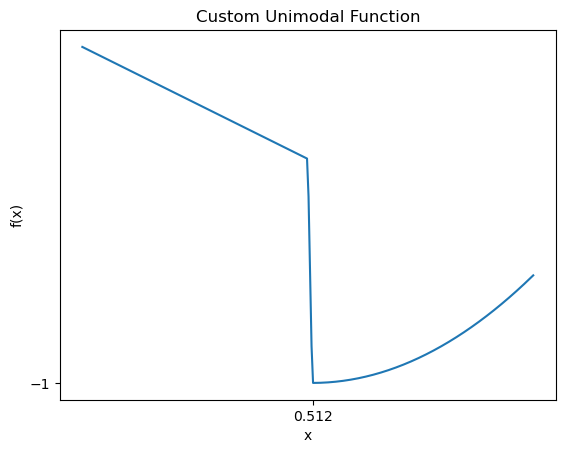

In [3]:
# loss_func = lambda x: (x)**5 - (x)**3 - (x-0.4)**2 + 0.3
def loss_func(x):
    # Define the pieces of the piecewise function
    if x < 0.5:
        return 2 - 2*x  # Quadratic function passing through (0, 2) and (0.5, 1)
    if x > 0.5 and x < 0.51 or x==0.5 or x==0.51:
        return 1 - 200*(x-0.5)
    else:
        return 4 * (x - 0.51)**2 - 1  # Quadratic function passing through (0.51, -1) and (1, 0)

plot_loss(loss_func, np.linspace(0, 1, 300))

In [4]:
def local_minimum_binary_search( 
        loss_func= lambda x:(x-.25)**2, 
        threshold=1e-4, 
        a=0, 
        b=.5, 
        max_eval=10,
        please_be_visual = False
        ):
    evaluated_points = {}
    eval_count = {}
    delta_loss = float('inf')

    def eval_func_at_points(eval_points):
        for point in eval_points:
            if point in evaluated_points.keys():
                val = evaluated_points[point]
            else:
                val = loss_func(point)
                evaluated_points[point] = val        
    
    grid = (b-a)/2
    eval_points = [a, a+grid, b]
    eval_func_at_points(eval_points)
    
    while True:
        eval_vals = list(evaluated_points.values())
        eval_grid = list(evaluated_points.keys())
        loss_0 = min(eval_vals)
        ind_min_val =  np.argmin(eval_vals)
        
        if please_be_visual:
            plt.plot(eval_grid,eval_vals, 'o')
            plt.plot(eval_grid[ind_min_val],loss_0,'x')
            plt.title( a)
            plt.show()
        if eval_grid[ind_min_val] == min(eval_grid):
            a = a - grid     
            eval_func_at_points([a])
        elif eval_grid[ind_min_val] == max(eval_grid):
            b = b+ grid
            eval_func_at_points([b])
        else:
            break

    while True:
        eval_vals = list(evaluated_points.values())
        eval_grid = list(evaluated_points.keys())
        loss_0 = min(eval_vals)
        ind_min_val =  np.argmin(eval_vals)
        
        if please_be_visual:
            plt.plot(eval_grid,eval_vals, 'o')
            plt.plot(eval_grid[ind_min_val],loss_0,'x')
            plt.show()

        delta_loss = min([abs(loss_0 - v) for i,v in enumerate(eval_vals) if i != ind_min_val])  
        if len(evaluated_points.values()) > max_eval:
            exit_criterion = "max_evals"
            break
        if delta_loss < threshold: 
            exit_criterion = "tolerance achieved"
            break         
        
        grid /=2
        eval_points = [eval_grid[ind_min_val]-grid, eval_grid[ind_min_val]+grid]
        eval_func_at_points(eval_points)

    return eval_grid[ind_min_val], loss_0, evaluated_points

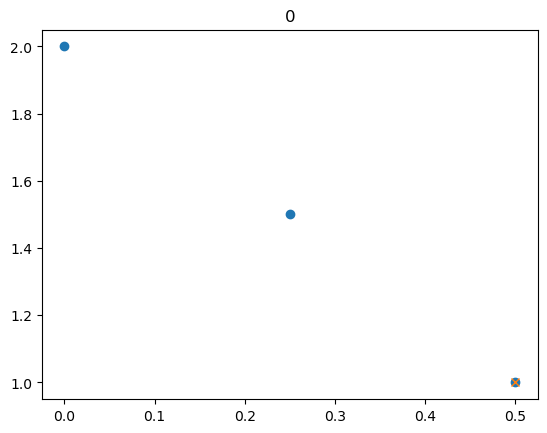

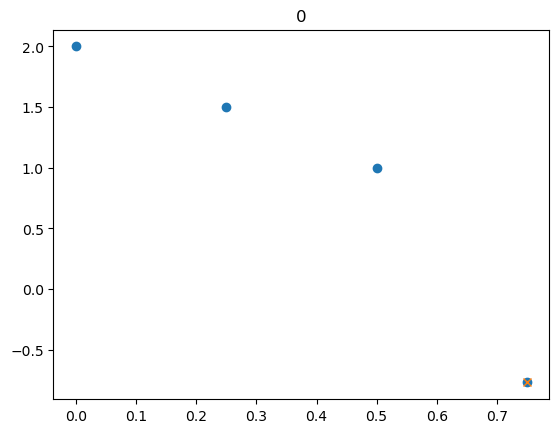

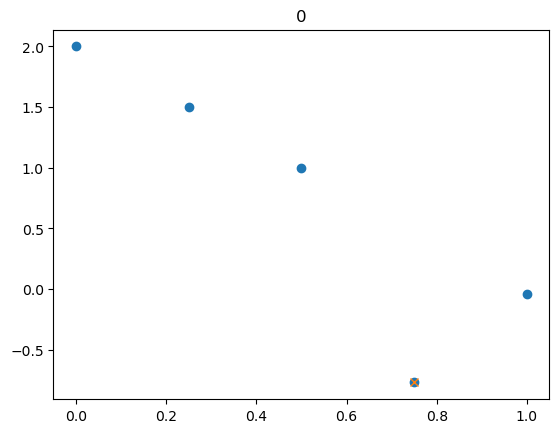

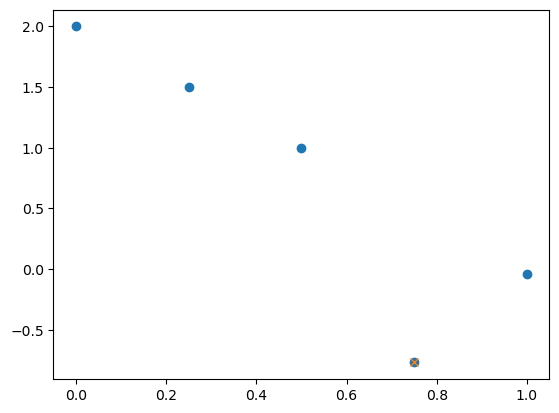

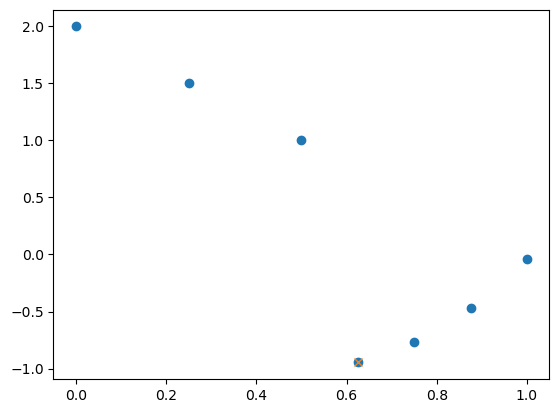

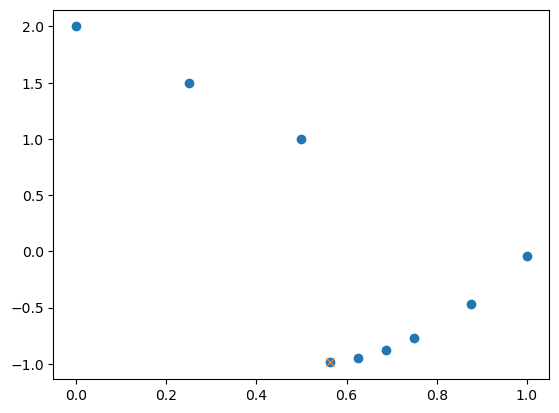

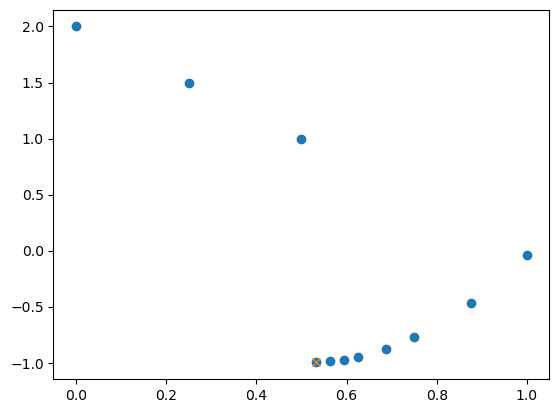

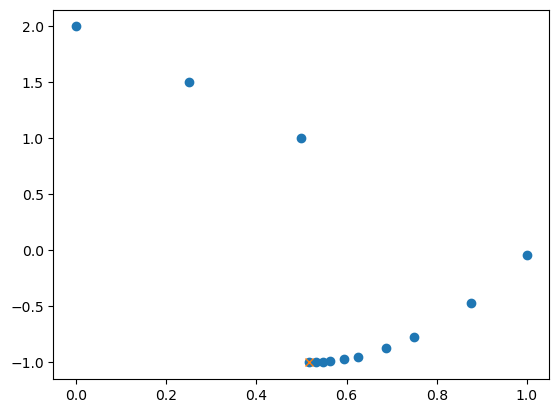

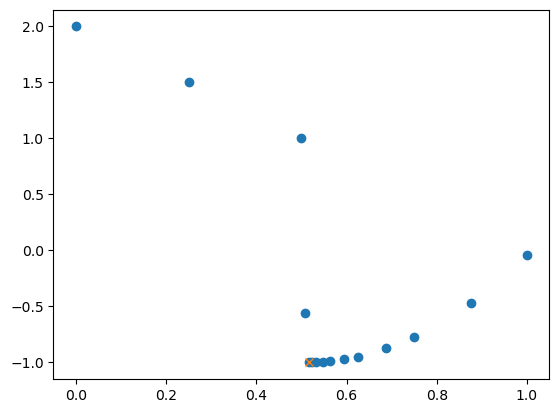

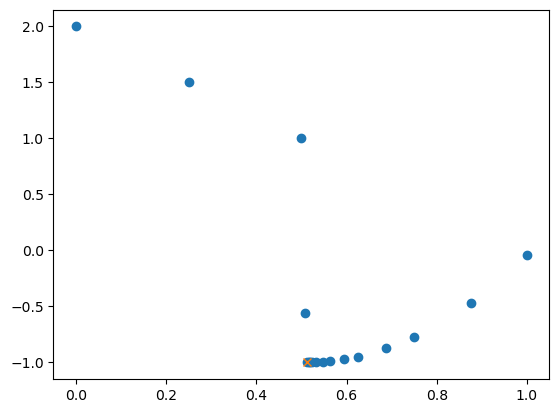

0.00011474609374995115 {'eval_count': 17} max_evals
min_point 0.51171875, min_val -0.99998818359375


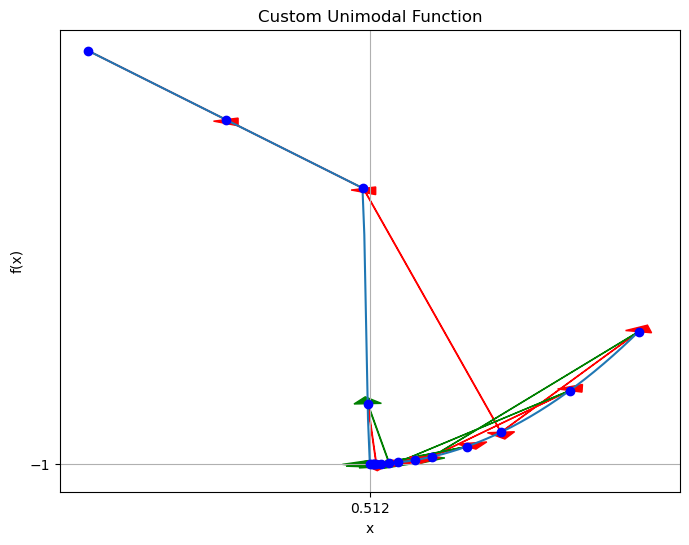

In [5]:
min_point, min_val, evaluated_points = discrete_gradient_descent(loss_func, a = 0, b=0.5, max_eval =15, threshold=1e-5)
print(f"min_point {min_point}, min_val {min_val}")
evaluated_points_sorted = dict(sorted(evaluated_points.items()))
plot_points_with_arrows(list(evaluated_points.keys()), list(evaluated_points.values()))
plot_loss(loss_func, np.linspace(0, 1, 300))

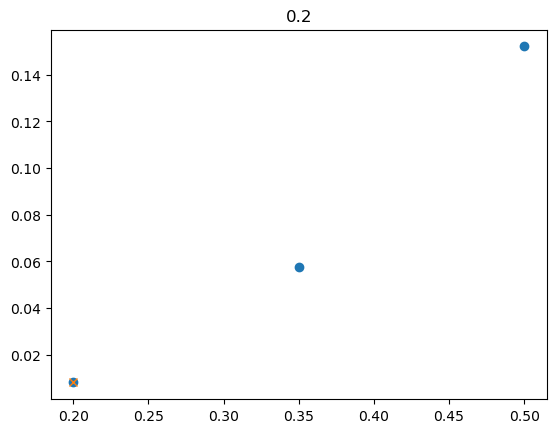

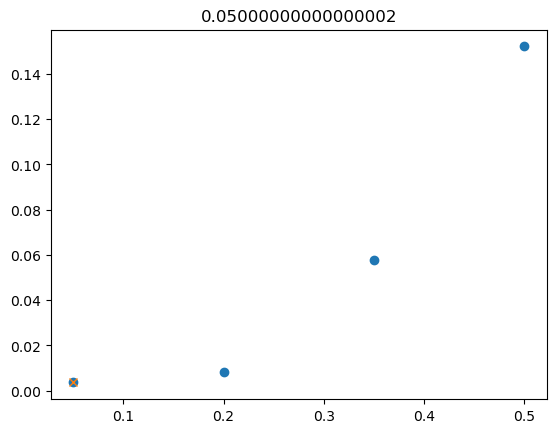

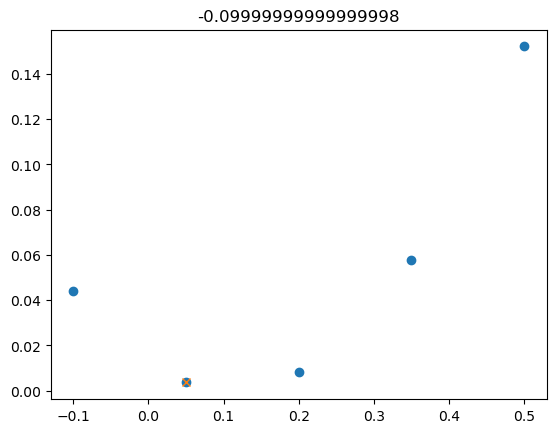

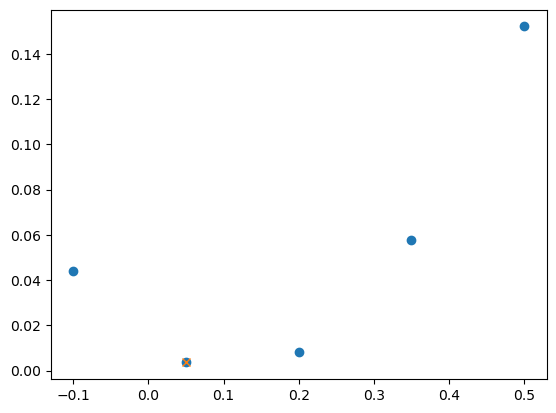

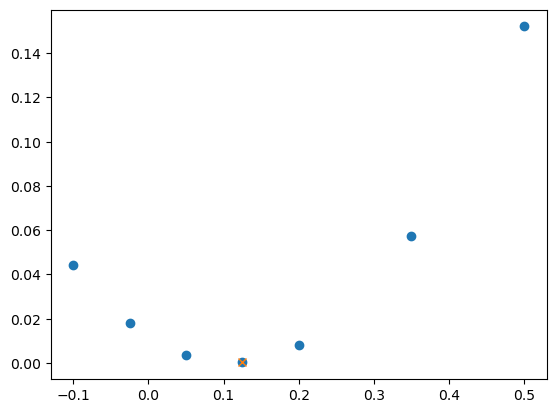

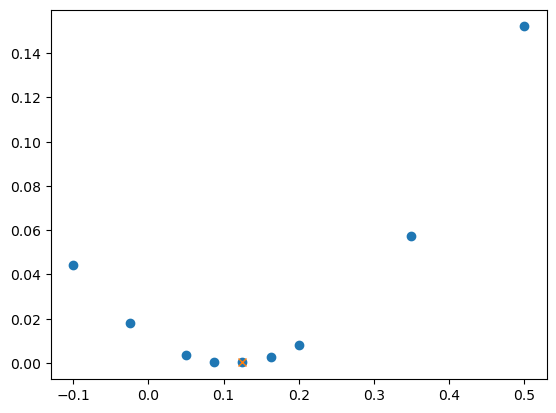

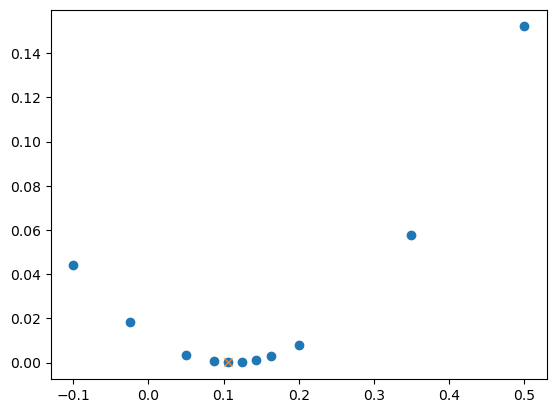

0.00021093749999999997 {'eval_count': 11} max_evals


In [6]:
min_point, min_val, evaluated_points = discrete_gradient_descent(lambda x: (x-.11)**2, a = 0.2, b=0.5, max_eval =10, threshold=1e-7)


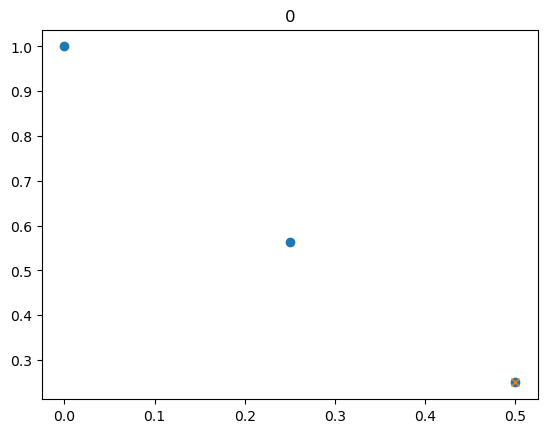

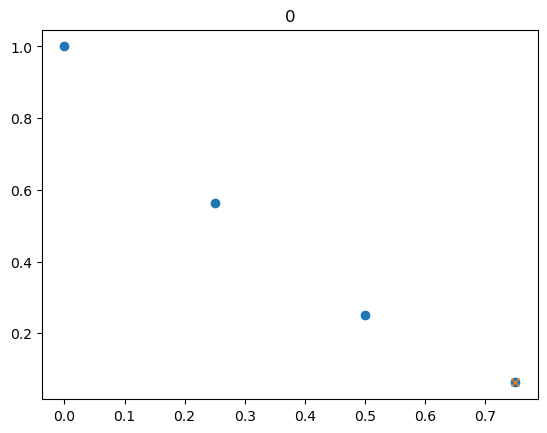

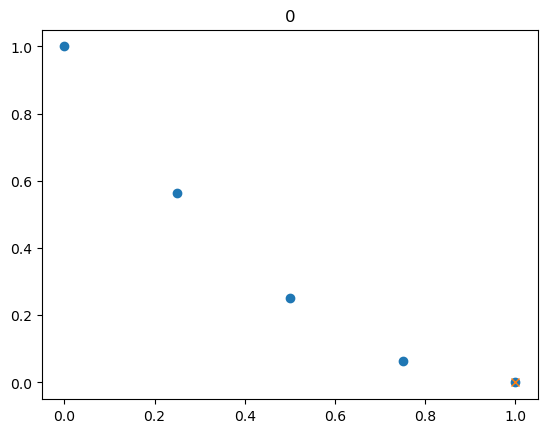

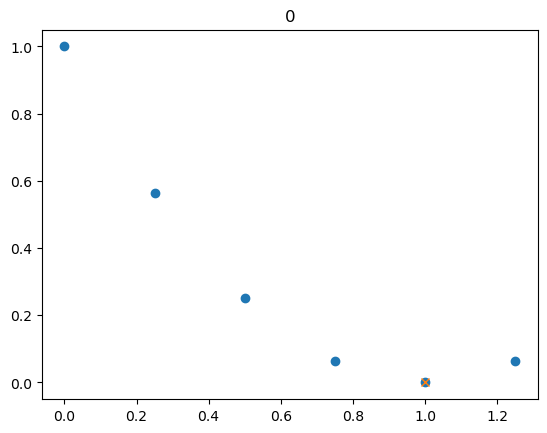

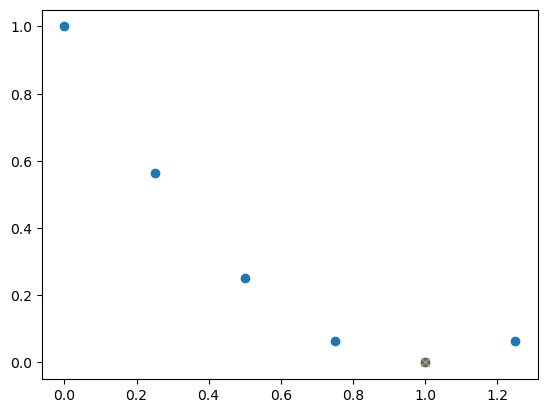

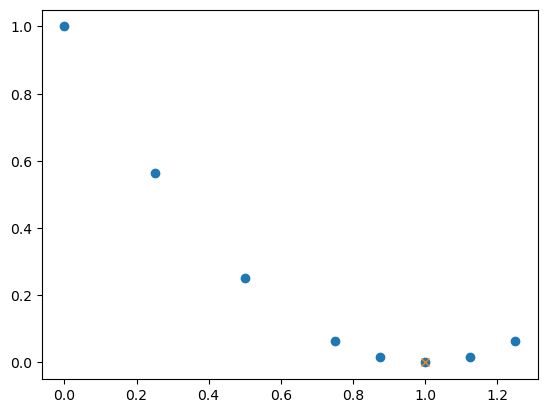

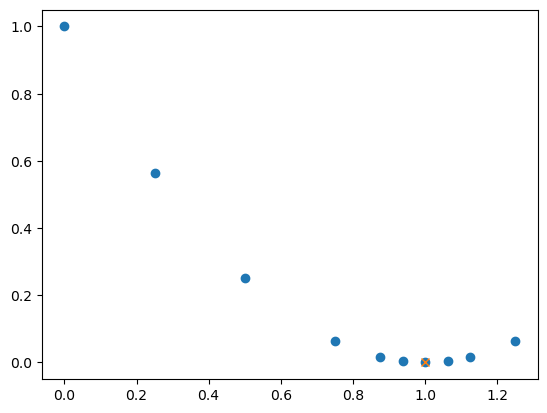

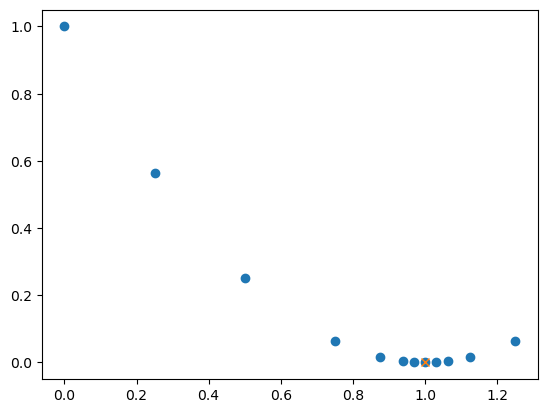

0.0009765625 {'eval_count': 12} max_evals


In [7]:
min_point, min_val, evaluated_points = discrete_gradient_descent(lambda x: (x-1)**2, a = 0, b=0.5, max_eval =10, threshold=1e-7)
